## Count dead gates from hitmap
First, run run_hitmap.py script to create hitmaps.

H1051 6 [4, 50, 92, 124, 129, 177]
H1061 7 [8, 24, 49, 72, 96, 129, 161]
H1071 6 [16, 48, 67, 99, 129, 160]
H1081 7 [40, 62, 70, 98, 113, 128, 161]
H1011 4 [34, 66, 129, 186]
H1021 7 [9, 56, 64, 121, 129, 167, 176]
H1031 7 [6, 59, 64, 115, 116, 154, 164]
H1041 4 [48, 87, 99, 138]
H1052 5 [1, 51, 85, 110, 129]
H1062 3 [1, 98, 129]
H1072 8 [0, 31, 38, 70, 96, 133, 160, 175]
H1082 4 [72, 95, 99, 129]
H1012 8 [0, 6, 48, 58, 64, 98, 155, 161]
H1022 7 [5, 34, 87, 103, 128, 154, 161]
H1042 8 [10, 38, 43, 64, 101, 128, 161, 166]
H2041 5 [55, 74, 125, 140, 175]
H2042 4 [26, 59, 150, 165]
H2051 4 [94, 127, 159, 184]
H2052 0 []
total 104


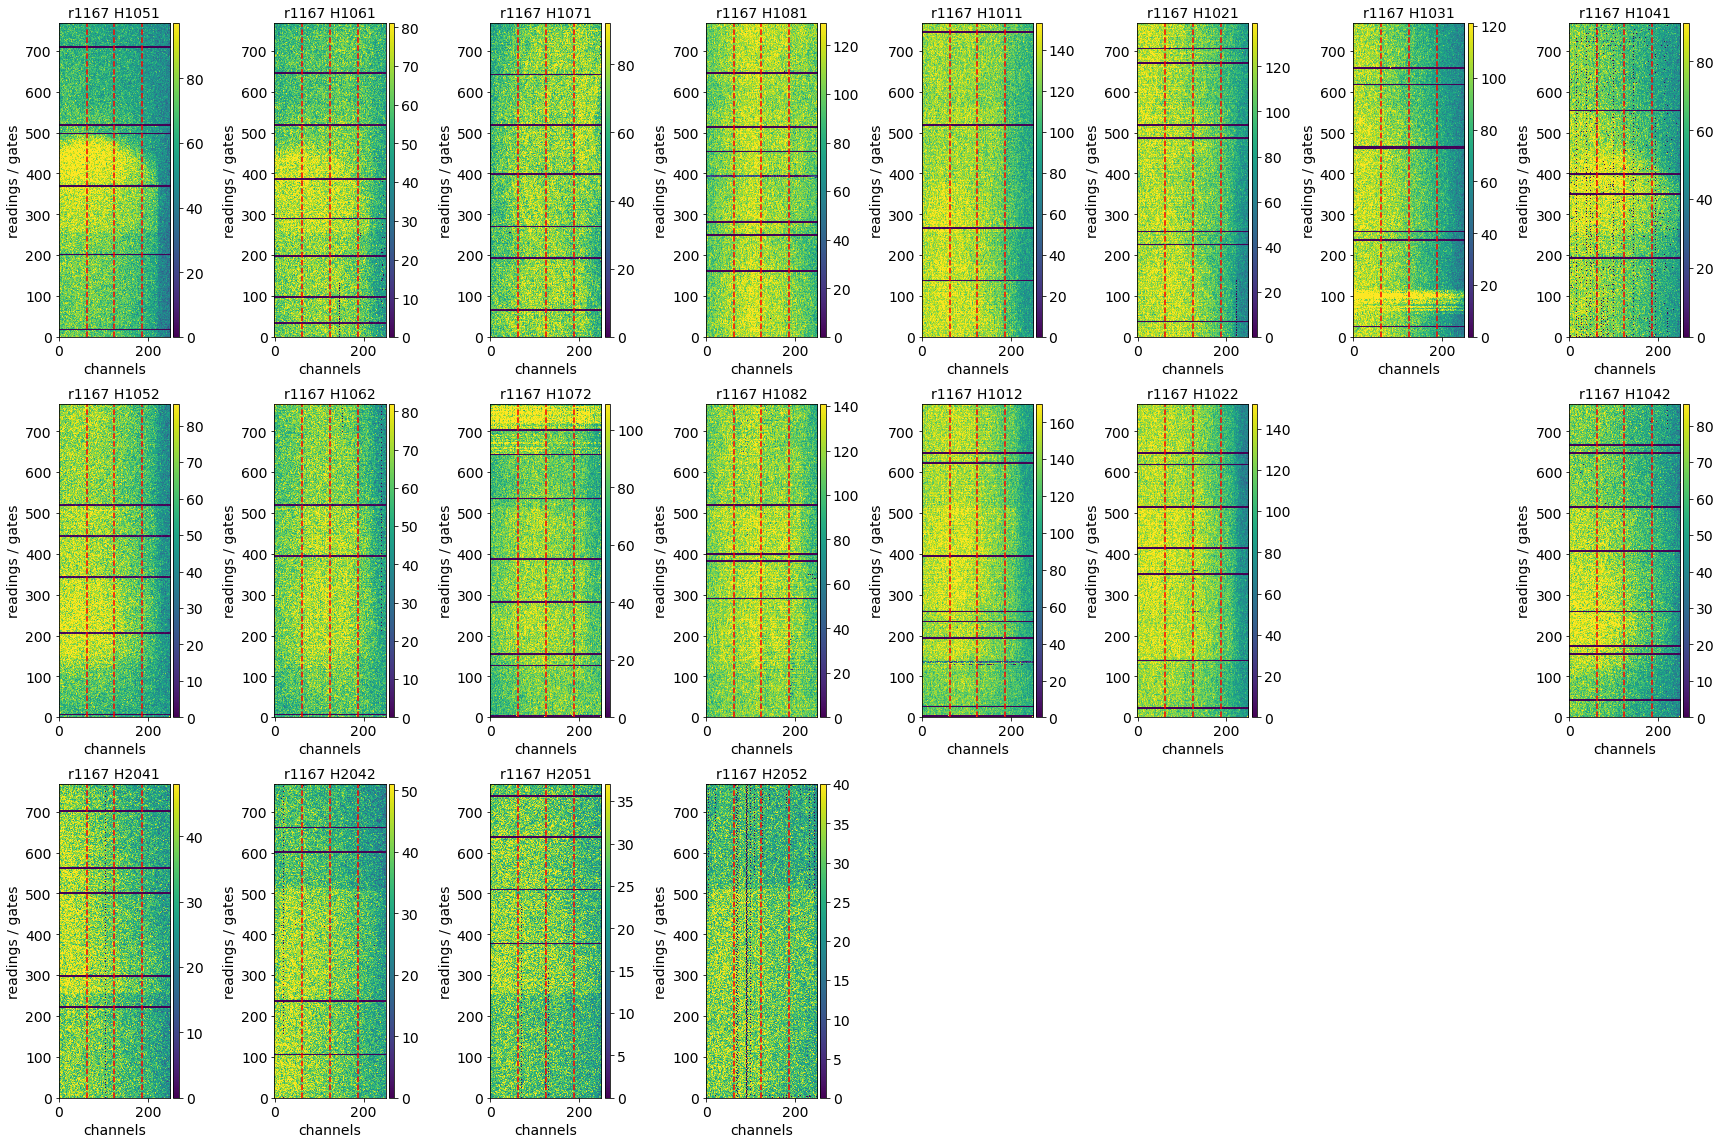

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import plots
from epics_utils import get_pv

expnr = 14
run = 1167


#hitmaps=np.load('hitmaps_%s_0.npy'%run).item()
# try:
#     hitmaps = np.load('/data_fast/hye/hitmaps_Exp%s_Run%s.npy'%(expnr, run), allow_pickle=True).item()
# except:
hitmaps = np.load('/home/ye/scripts/hitmaps_Exp%s_Run%s.npy'%(expnr, run), allow_pickle=True).item()
    
import mapping
import numpy.ma as ma

devices={}
modules={}
module_type={}

ineffgates={}

pos = ['H1051','H1061','H1071','H1081','H1011','H1021','H1031','H1041',
       'H1052','H1062','H1072','H1082','H1012','H1022','H1032','H1042',
       'H2041','H2042','H2051','H2052']

fig = plt.figure(figsize=(24,16), tight_layout=True)
# fig.suptitle('e0012r%04i'%run)
 
ntotal = 0
for i, dhe in enumerate(pos):
    if dhe == 'H1032':
        continue

    devices[dhe] = get_pv("PXD:B:config-"+dhe,"device_config:VALUE:set").get()
    modules[dhe] = get_pv("PXD:B:config-"+dhe,"device_module:VALUE:set").get()
    module_type[dhe] = get_pv("PXD:B:config-"+dhe,"module_type:VALUE:set").get()

    mapper = mapping.mapper(module_type='pxd9', module_flavor=module_type[dhe], asicpair=0)
    
    ## if any mask to apply
#     mask = np.load('/data/commissioning/runs/all/EXP0014/Run%04i_%s_occ_mask.npy'%(run,dhe), allow_pickle=True)
#     mhitmap = mapper(ma.array(hitmaps[dhe], mask=mask))
    mhitmap = ma.array(mapper(hitmaps[dhe]))

    ## mask the firing pxiels
    for s in np.transpose(np.where((mhitmap>5e3)|(mhitmap<=0))):
        #print s, mhitmap[s[0],s[1]]
        mhitmap[s[0],s[1]]=ma.masked
        
    mhitmap2 = mapping.matrixToDcd(mhitmap)
    gmean = np.mean(mhitmap2)
    gmean0 = np.mean(mhitmap2,axis=1)

    ## criterion to select dead gates
    ineffgates[dhe] = [i for i,j in enumerate(gmean0) if j< 0.56*np.mean(gmean0[max(0,i-2):min(192,i+2)]) and j<0.8*gmean]
    
    print(dhe, len(ineffgates[dhe]), ineffgates[dhe])

    ntotal += len(ineffgates[dhe])

    plots.plot_occupancyXY(hitmaps[dhe], fig.add_subplot(3,8,i+1),device=devices[dhe], module=modules[dhe], 
                           module_type=module_type[dhe], asicpair=0,title='r%s %s'%(run,dhe),
                           vmin=0,vmax=np.percentile(hitmaps[dhe], 95), 
                           colorbar=True,colorbartext="")
    
#     print dhe, ineffgates[dhe]

print('total', ntotal)

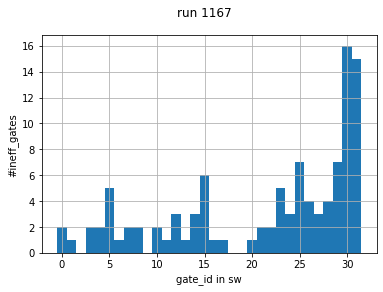

In [20]:
dhes = ['H1051','H1061','H1071','H1081','H1011','H1021','H1031','H1041',
       'H1052','H1062','H1072','H1082','H1012','H1022','H1042',
       'H2041','H2042','H2051','H2052']

sw={}
for dhe in dhes:
    if module_type[dhe] in ['if','ib']:
        sw[dhe] = [[(191-i)/32, (191-i)%32] for i in ineffgates[dhe]]
    elif module_type[dhe] in ['of','ob']:
        sw[dhe] = [[(i)/32, (i)%32] for i in ineffgates[dhe]]
    

fig, ax= plt.subplots(figsize=(6,4))
ax.hist([x[1] for dhe in dhes for x in sw[dhe]],32,(-0.5,31.5))
fig.suptitle('run %s'%run)
ax.set_xlabel('gate_id in sw')
ax.set_ylabel('#ineff_gates')
ax.grid()

## Extract dead_gates statistic from run_ana

H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 99, 129]
H1082 [72, 95, 9

Text(0.5, 0, 'EXP14 run')

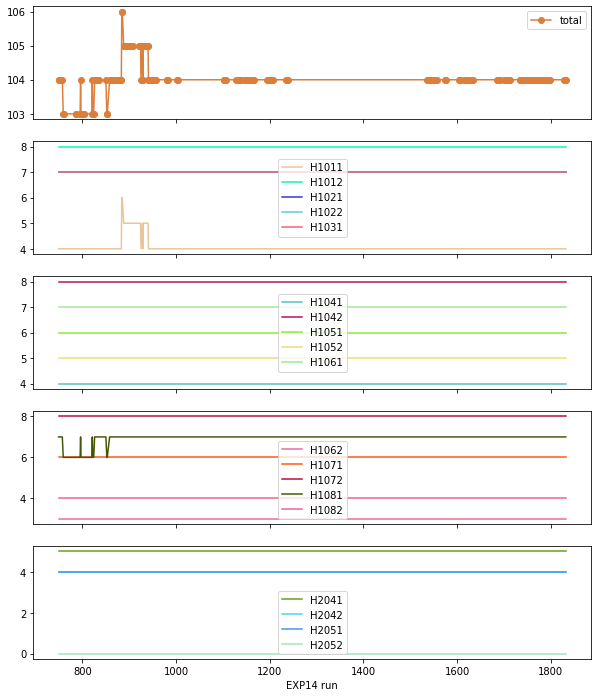

In [28]:
from glob import glob
import re
import numpy as np
from matplotlib import pyplot as plt
import random

ncolors = 20
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(ncolors)]

expnr = 14
fileslist = glob('/data/commissioning/runs/all/EXP%04i/analysis/*/analysis.npy'%expnr)
# print(fileslist)

dhes = sorted(['H1051','H1061','H1071','H1081','H1011','H1021','H1031','H1041',
       'H1052','H1062','H1072','H1082','H1012','H1022','H1042',
       'H2041','H2042','H2051','H2052'])
x = []
y = {dhe:[] for dhe in dhes}
y['total'] = []

for f in sorted(fileslist):
    runnr = int(re.findall('run\d+',f)[0][-4:])
    if runnr<700:
        continue
    try:
        ana = np.load(f,allow_pickle=True).item()
    except Exception as e:
#         print('error in load run%s'%runnr)
        continue
#     else:
#         print(f)

    if ana['ineff_gates']['total'] == 0:
        continue
        
    x.append(runnr)
    y['total'].append(ana['ineff_gates']['total'])
    for dhe in dhes:
        y[dhe].append(len(ana['ineff_gates'][dhe]))
#     print('H1082',ana['ineff_gates']['H1082'])
        
fig, ax = plt.subplots(5,1,figsize=(10,12),sharex=True)
ax[0].plot(x, y['total'], label='total', c=color[0], marker='o')
for i,dhe in enumerate(dhes):
    ax[int(i/5)+1].plot(x, y[dhe], label=dhe, c=color[i+1])

for i in range(5):
    ax[i].legend()

ax[4].set_xlabel('EXP%s run'%expnr)